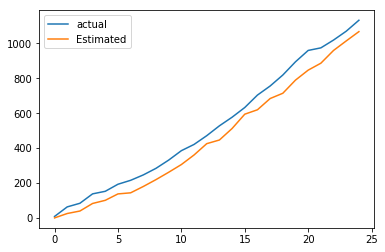

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy.linalg import matrix_rank

actual_accelaration = [0,0,1,1.2,3,3.5,4,4,4.5,6,6.1,5,4,3.3,2.3,1,0,-1,-2,-4,-6,-2,0,1,1]
iteration = len(actual_accelaration)

error_estimated_x = 15
error_estimated_v = 5

num_particle = 10
x_particle= np.zeros([num_particle], dtype = float)
x_sampled= np.zeros([num_particle], dtype = float)
w_particle= np.zeros([num_particle], dtype = float)

error_observation_x = 20
error_observation_v = 9

t=1
totalStateVariable = 2

actual_x= np.zeros([iteration], dtype = float)
observations_x= np.zeros([iteration], dtype = float)
estimated_x= np.zeros([iteration], dtype = float)
actual_v= np.zeros([iteration], dtype = float)

i=0
for i in range(iteration):

    if i == 0:
        v = 10
        x = 0
    else:
        v= actual_v[i-1]+actual_accelaration[i-1]*t
        x= actual_x[i-1] + actual_v[i-1]*t+ 0.5 * actual_accelaration[i] * t**2

    actual_x[i] = x + np.random.randn() * error_estimated_x
    actual_v[i] = v + np.random.randn() * error_estimated_v

    observations_x[i] = actual_x[i] + np.random.randn() * error_observation_x


#gaussian function
def normpdf(x, mean, sd):
    var = float(sd)**2
    denomerator = (2*math.pi*var)**.5
    numerator = math.exp(-(float(x)-float(mean))**2/(2*var))
    return numerator/denomerator

def getResampleParticleIdx (w_array, tw):

    cw_array = np.zeros([num_particle], dtype = float)
    cw_array[0] = w_array[0]
    for i in range(1, totalStateVariable):
        cw_array[i] = cw_array[i-1] + w_array[i]

    u = np.random.uniform(0, tw)
    
    ix = totalStateVariable-1
    for ix in range(totalStateVariable-1, -1, -1):
        if(u > cw_array[ix]):
            break
    return ix

# initialize particle
for i in range(0, totalStateVariable):
    x_particle[i] = actual_x[0] + np.random.randn() * error_observation_v
    #print(x_particle[i])



for i in range(1, iteration):

    TotalWeight = 0.0

    # weight assignment
    for j in range(totalStateVariable):
        v = actual_v[i - 1] + actual_accelaration[i - 1] * t
        x_predicted = x_particle[j] + actual_v[i - 1] * t + 0.5 * actual_accelaration[i] * t ** 2
        x_sampled[j] = x_predicted + np.random.randn() * error_estimated_x
        w_particle[j] = normpdf(observations_x[i], x_sampled[j], error_estimated_x)
        TotalWeight = TotalWeight + w_particle[j]

    # Resampling
    idx = 0
    for j in range(totalStateVariable):
        idx = getResampleParticleIdx(w_particle, TotalWeight)
        x_particle[j] = x_sampled[idx]


    #Update
    estimated_x[i] = np.amax(x_sampled)


plotX = np.arange(0, iteration)
lgnd = ["actual", "Estimated"]
plt.plot(plotX, actual_x)
plt.plot(plotX, estimated_x)
plt.legend(lgnd)
plt.show()

